# __Modelacion de datos__

## Cargar datos procesados

In [4]:
# Librerias
%matplotlib inline
import pandas as pd

In [5]:
# cargar datos procesados
compras_df = pd.read_csv('../data_out/compras_df_enriched.csv')
compras_df.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,DIA,MES,YEAR,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS,11,12,2020,13,881659.731797,True
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS,11,12,2020,13,881659.731797,True
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS,11,12,2020,13,881659.731797,True
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS,11,12,2020,13,881659.731797,True
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS,23,12,2020,13,881659.731797,True


## Probar un modelo supervisado

### Rellenar valores faltantes y convertir variables categoricas a numericas

In [6]:
data = compras_df.copy()

for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == 'object':
        # rellenar variable categorica con la moda
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        # convertir a tipo categorica
        data[data.columns[i]] = data[data.columns[i]].astype('category').cat.codes
    else:
        # rellenar variables numericas con la media
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())


In [7]:
data.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,DIA,MES,YEAR,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE
0,110152,161,167,1388,130,780,1,1019110.0,8,14911.80,2,11,12,2020,13,881659.731797,True
1,110152,161,167,1389,135,845,1,1019110.0,8,2528.80,2,11,12,2020,13,881659.731797,True
2,110152,161,167,1390,132,759,1,1019110.0,8,8500.02,2,11,12,2020,13,881659.731797,True
3,110152,161,167,1391,131,757,1,1019110.0,8,2400.01,2,11,12,2020,13,881659.731797,True
4,110152,161,167,1392,417,859,1,299001496.0,16,1537.00,2,23,12,2020,13,881659.731797,True


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM BEN                 1540 non-null   int64  
 1   BENEFICIARIO            1540 non-null   int16  
 2   RFC                     1540 non-null   int16  
 3   FACTURA                 1540 non-null   int16  
 4   CONTRATO                1540 non-null   int16  
 5   CONCEPTO                1540 non-null   int16  
 6   TIPO                    1540 non-null   int8   
 7   # OP                    1540 non-null   float64
 8   FECHA                   1540 non-null   int8   
 9   IMPORTE                 1540 non-null   float64
 10  SHEET                   1540 non-null   int8   
 11  DIA                     1540 non-null   int64  
 12  MES                     1540 non-null   int64  
 13  YEAR                    1540 non-null   int64  
 14  BENEFICIARIO_SALES      1540 non-null   

> Todas las variables estan en el formato numerico y booleano lo cual es ideal para entrenar modelos

### Crear Modelo RandomForest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [10]:
# separar caracteristicas y variable objetivo
X = data.copy()
y = data.pop('IMPORTE')

# dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

# crear modelo
# max_depth: profundidad del arbol. Depende del numero de variables. Raiz cuadrada del numero de variables
clf = RandomForestRegressor(n_estimators=1000, max_depth=4)

# entrenamos el modelo
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [11]:
# Evaluar el modelo

# importar metricas de evaluacion
from sklearn.metrics import r2_score

r2_score(y_test, clf.predict(X_test))

0.9543574848239358

> El valor de R cuadrado obtenido puede ser engañoso. Debemos contrastarlo con un grafico de los errores.

## Probar un modelo no supervisado o de clustering para texto

In [12]:
import gensim
from nltk.corpus import stopwords
import numpy as np
np.random.seed(2021)

### Tokenizar negocios 

In [13]:
# funcion para tokenizar el texto
def preprocess(text):
    result = []
    for token in text.split():
        if token not in stopwords.words('spanish') and len(token)>4:
            result.append(token)
    return result

In [14]:
# negocios tokenizados
process_business = [preprocess(x) for x in list(compras_df['BENEFICIARIO'].unique())]
process_business

[['LLANTAS', 'SERVICIOS', 'SERNA', 'ANAHUAC,S.A.'],
 ['MAQUINARIA', 'EQUIPO,', 'S.A.DE'],
 ['PLOMIFERRETERA', 'TORNILLO,'],
 ['EQUIPOS', 'ACCESORIOS', 'CANTU,'],
 ['PRAXAIR', 'MEXICO'],
 ['COMERCIALIZADORA', 'HNOS.ALVAREZ', 'FLORES,S.A.DE'],
 ['DISTRIBUIDORA', 'FRUTAS', 'LEGUMBRES', 'HORTALIZA,S.A.DE'],
 ['NUÑEZ', 'LOPEZ', 'VIRGINIA'],
 ['S.I.M.E.P.R.O.D.E.'],
 ['TRACTORES', 'MAQUINARIA', 'REAL,'],
 ['TELEFONOS', 'MEXICO,S.A.B'],
 ['MERCANTIL', 'DISTRIBUIDORA,'],
 ['GRANA,S.A.'],
 ['INTERNACIONAL', 'MONTERREY,A.C.'],
 ['EMPACADORA', 'DISTR.DE', 'CARNES', 'FINAS', 'JUAN,S.A.DE'],
 ['VIVERO', 'ESCORIAL,'],
 ['AMERICANA,S.A.DE'],
 ['MANTENIMIENTO', 'ELECTRICO', 'POTENCIA,S.A.DE'],
 ['AUTOKAM', 'REGIOMONTANA,S.A.DE'],
 ['CLIMEEZ', 'NORTE,S.A.DE'],
 ['VALUE', 'ARRENDADORA,S.A.DE', 'SOFOM', 'VALUE', 'GPO.FIN.'],
 ['SEGUROS', 'AFIRME,', 'AFIRME', 'GRUPO', 'FINANCIERO'],
 ['DESARROLLOS', 'CONSTRUCTIVOS', 'NACIONALES,S.A.DE'],
 ['BIOANALISIS', 'SERVICIOS', 'HEMATOLOGICOS'],
 ['SUAREZ', 'MOBILIA

### Crear insumos para clusterizar

In [15]:
# crear diccionario de la serie de negocios limpia
dictionary = gensim.corpora.Dictionary(process_business)

In [16]:
# quitar ocurrencias muy frecuentes y poco frecuentes
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [17]:
# construimos el corpus con el diccionario anterior
bow_corpus = [dictionary.doc2bow(doc) for doc in process_business]

### Modelo de clusterizacion

In [18]:
# construimos el modelo
lda_model = gensim.models.LdaMulticore(
    bow_corpus, 
    num_topics=6, 
    id2word=dictionary, 
    passes=10, 
    workers=2
    )

In [19]:
# observaciones por cluster
for idx, type_business in lda_model.print_topics(-1):
    print('Topic:{} Words:{}'.format(idx, type_business))

Topic:0 Words:0.010*"DESARROLLOS" + 0.010*"GARZA" + 0.010*"GUERRERO" + 0.010*"INSTITUTO" + 0.010*"SALAZAR" + 0.010*"ADRIANA" + 0.010*"BANCO" + 0.010*"URBANIZACIONES" + 0.010*"IGNACIO" + 0.010*"JESUS"
Topic:1 Words:0.033*"GARCIA" + 0.021*"GONZALEZ" + 0.021*"GARZA" + 0.018*"MARIA" + 0.013*"TREVIÑO" + 0.013*"SANCHEZ" + 0.013*"MARCELO" + 0.013*"ARTURO" + 0.013*"MANUEL" + 0.009*"ALBERTO"
Topic:2 Words:0.015*"GRUPO" + 0.010*"SERVICIOS" + 0.010*"ESTHER" + 0.010*"MARTINEZ" + 0.010*"MONTERREY" + 0.010*"CONSTRUCTORA" + 0.010*"MORENO" + 0.005*"ALEJANDRO" + 0.005*"VILLARREAL" + 0.005*"HERNANDEZ"
Topic:3 Words:0.026*"MARIA" + 0.023*"RODRIGUEZ" + 0.019*"GONZALEZ" + 0.018*"GOMEZ" + 0.012*"LOZANO" + 0.008*"TORRES" + 0.008*"DESARROLLO" + 0.008*"PEREZ" + 0.008*"SEGURIDAD" + 0.008*"SANCHEZ"
Topic:4 Words:0.031*"CONSTRUCTORA" + 0.018*"CONSTRUCCIONES" + 0.018*"MEXICO," + 0.010*"NUEVO" + 0.010*"RAMIREZ" + 0.010*"SEGUROS" + 0.010*"INTEGRACION" + 0.010*"SEBASTIAN," + 0.010*"ARRENDADORA" + 0.010*"GRUPO"
Topic:

In [20]:
# funcion que asigna a cada cluster su nombre
def get_max_topic(index):
    results = lda_model[bow_corpus[index]]
    return max(lda_model[results], key=lambda x: x[1])[0]

In [21]:
business_cluster = {x: get_max_topic(i) for i, x in enumerate(list(compras_df['BENEFICIARIO'].unique()))}

In [22]:
business_cluster

{'LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.': 0,
 'GH MAQUINARIA Y EQUIPO, S.A.DE C.V.': 0,
 'PLOMIFERRETERA EL TORNILLO, S.A. DE C.V.': 2,
 'EQUIPOS Y ACCESORIOS CANTU, S.A. DE C.V.': 2,
 'PRAXAIR MEXICO S. DE R.L. DE C.V.': 5,
 'COMERCIALIZADORA HNOS.ALVAREZ FLORES,S.A.DE C.V.': 0,
 'DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALIZA,S.A.DE C.V.': 2,
 'NUÑEZ LOPEZ VIRGINIA': 5,
 'S.I.M.E.P.R.O.D.E.': 2,
 'TRACTORES Y MAQUINARIA REAL, S.A. DE C.V.': 2,
 'TELEFONOS DE MEXICO,S.A.B DE C.V.': 0,
 'MERCANTIL DISTRIBUIDORA, S.A. DE C.V.': 0,
 'GRANA,S.A.': 0,
 'CLUB INTERNACIONAL DE MONTERREY,A.C.': 0,
 'EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S.A.DE C.V.': 5,
 'VIVERO EL ESCORIAL, S.A. DE C.V.': 0,
 'CAR ONE AMERICANA,S.A.DE C.V.': 2,
 'MANTENIMIENTO ELECTRICO DE POTENCIA,S.A.DE C.V.': 0,
 'AUTOKAM REGIOMONTANA,S.A.DE C.V.': 2,
 'CLIMEEZ DEL NORTE,S.A.DE C.V.': 5,
 'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.': 5,
 'SEGUROS AFIRME, S.A. DE C.V. AFIRME GRUPO FINANCIERO': 0

### Obtener importe promedio

In [23]:
compras_df['CLUSTER_NAME'] = compras_df['BENEFICIARIO'].apply(lambda x: business_cluster[x])
compras_df['CLUSTER_NAME'].value_counts()

CLUSTER_NAME
2    858
0    416
5    266
Name: count, dtype: int64

> Se generaron tres clusteres que agrupan todo el texto

<AxesSubplot:xlabel='CLUSTER_NAME'>

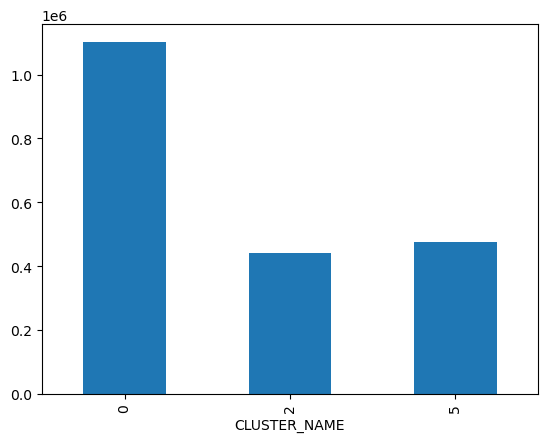

In [24]:
# grafico de barra del importe promedio para cada cluster
compras_df.groupby('CLUSTER_NAME')['IMPORTE'].mean().plot.bar()

## Probar un modelo no supervisado de anomalias en cuanto a importes

In [25]:
import numpy as np
from scipy.stats import norm

In [26]:
# encontrar parametros de la curva normal de los importes
params = norm.fit(compras_df['IMPORTE'])
params

(626317.9473441559, 4665396.47441213)

> Media de 4.665.396

> Desviacion estandar de 626.317

Ahora, vamos a analizar cual es la probabilidad de tener cierto dato en la curva normal de acuerdo al importe. Cualquier valor arriba de 0.95 es considerado outlier

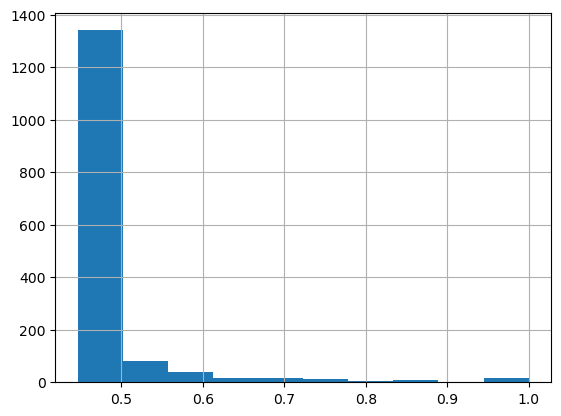

In [27]:
# nueva columna para almacenar la probabilidad de cada valor de importe
compras_df['PROB_TOTAL'] = [norm(params[0], params[1]).cdf(x) for x in compras_df['IMPORTE']]

# mostrar histograma de las probabilidades
compras_df['PROB_TOTAL'].hist();

> Vamos a analizar los valores con probabilidad en el extremo filtrandolos

In [28]:
# obtener registros con prob mayor a 0.95
compras_df[compras_df['PROB_TOTAL']>0.95]

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET,DIA,MES,YEAR,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO,HAS_LINKEDIN_SITE,CLUSTER_NAME,PROB_TOTAL
283,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS106845-158003-5868,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000051.0,2020-12-30,9.000000e+06,GASTOS VARIOS,30,12,2020,2,881659.731797,True,2,0.963661
353,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-23-2020-158004-1712,NO APLICA,FONDO SAPS 23-2020,TR,1019137.0,2020-12-11,9.071256e+06,GASTOS VARIOS,11,12,2020,2,881659.731797,True,0,0.964862
354,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-24-2020-158004-1751,NO APLICA,FONDO SAPS 24-2020,TR,1019152.0,2020-12-18,9.078245e+06,GASTOS VARIOS,18,12,2020,2,881659.731797,True,0,0.964978
357,126671,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",BBA130722BR7,144-153001-167,NO APLICA,APORTACIÓN MUNICIPAL AL FIDEICOMISO LA GRAN CI...,TR,1019122.0,2020-12-11,3.000000e+07,GASTOS VARIOS,11,12,2020,1,881659.731797,False,0,1.000000
367,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,7.386437e+07,GASTOS VARIOS,17,12,2020,16,881659.731797,True,0,1.000000
368,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,7.635249e+07,GASTOS VARIOS,17,12,2020,16,881659.731797,True,0,1.000000
369,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,1.924614e+07,GASTOS VARIOS,17,12,2020,16,881659.731797,True,0,0.999967
370,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,3.610189e+07,GASTOS VARIOS,28,12,2020,16,881659.731797,True,0,1.000000
372,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,3.357936e+07,GASTOS VARIOS,28,12,2020,16,881659.731797,True,0,1.000000
374,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,1.336286e+07,GASTOS VARIOS,28,12,2020,16,881659.731797,True,0,0.996833


> A partir de estos registros se podria obtener historias sobre los outliers de interes. Un ejemplo es analizar los gastos varios.

Vamos a representas las anomalias de acuerdo a que categorias hayan. Ejemplo, vimos que los gastos varios estaban mas altos que otros gastos. Analicemos las anomalias de acuerdo a la hoja donde se encuentra

In [ ]:
model_sheet = {}
for sheet in list(compras_df['SHEET'].unique()):
    sheet_compras = co